In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
l = pd.read_csv("learning_loss.csv",header=1)
l.head()

,Loss
0,0.014190
1,0.014294
2,0.010706
3,0.008309
4,0.006038


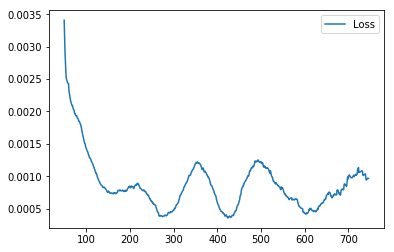

In [3]:
l.rolling(50).mean().plot()


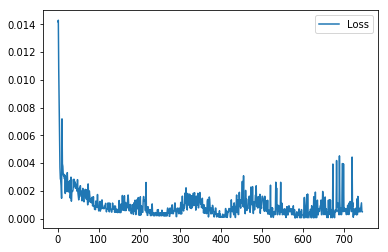

In [4]:
l.plot()

In [5]:
loss_trend = list(l['Loss'].values)
big_loss   = np.max(loss_trend)
last_loss  = np.mean(loss_trend[-50:])
print(big_loss)
print(last_loss)

0.014294073999999999
0.0009657433423


In [6]:
print(l.max())
print(l.tail(50).mean())

Loss    0.014294
dtype: float64
Loss    0.000966
dtype: float64


In [7]:
1 - (l.max()  - l.tail(50).mean())/l.max()

Loss    0.067562
dtype: float64

In [8]:
df = pd.read_csv("game_history.csv",header=5)

In [9]:
df['game_over'].sum()


18.0

In [10]:
df.head()

,timer,s0_player_x,s0_player_y,s0_coins,s0_coin_0_x,s0_coin_0_y,s0_coin_1_x,s0_coin_1_y,s0_coin_2_x,s0_coin_2_y,...,s1_coin_16_y,s1_coin_17_x,s1_coin_17_y,s1_coin_18_x,s1_coin_18_y,s1_coin_19_x,s1_coin_19_y,s1_balls,game_over,reward
0,1.0,0.5000,0.5000,1.0,0.97,0.43,0.3775,0.8625,0.4925,0.9375,...,0.9325,0.1875,0.68,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,2.0,0.5125,0.4875,0.9,0.97,0.43,0.3775,0.8625,0.4925,0.9375,...,0.9325,0.1875,0.68,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.5250,0.5000,0.9,0.97,0.43,0.3775,0.8625,0.4925,0.9375,...,0.9325,0.1875,0.68,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.5125,0.5125,0.9,0.97,0.43,0.3775,0.8625,0.4925,0.9375,...,0.9325,0.1875,0.68,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,0.5000,0.5250,0.9,0.97,0.43,0.3775,0.8625,0.4925,0.9375,...,0.9325,0.1875,0.68,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
len(df)

70125

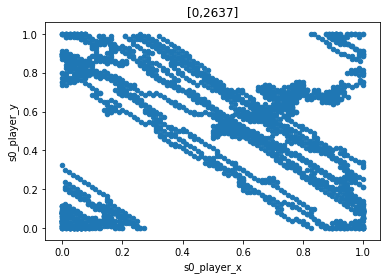

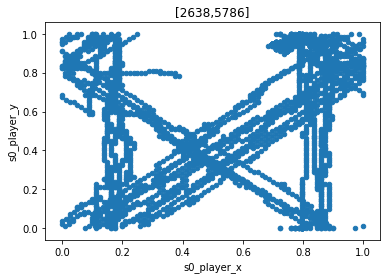

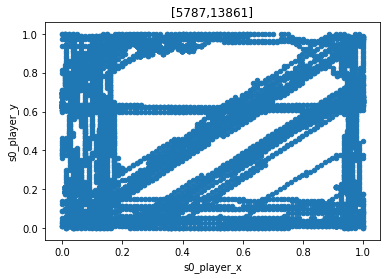

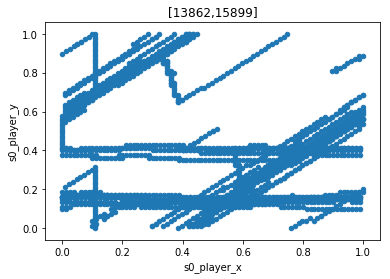

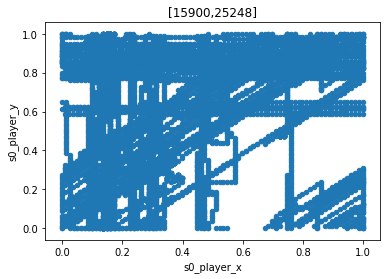

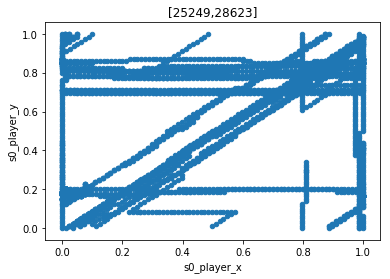

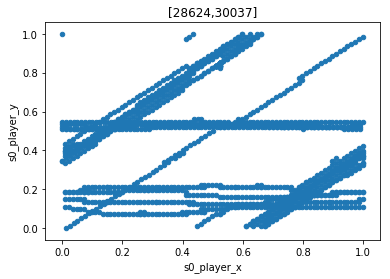

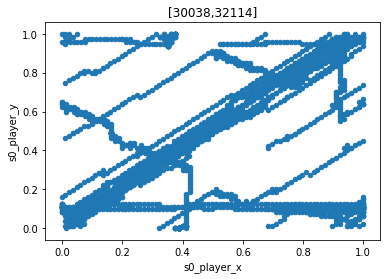

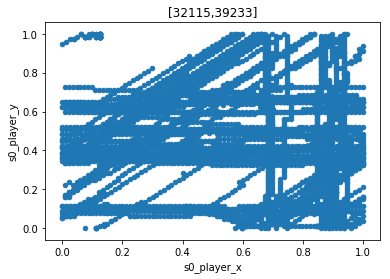

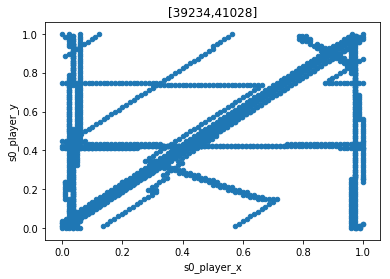

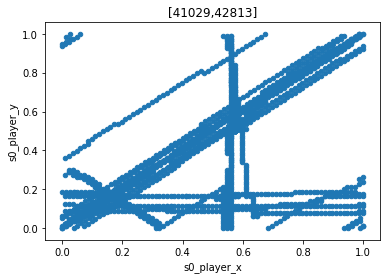

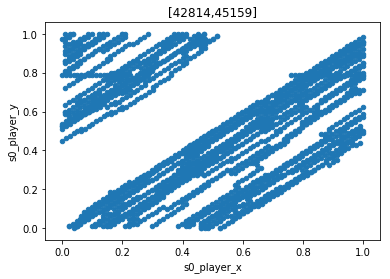

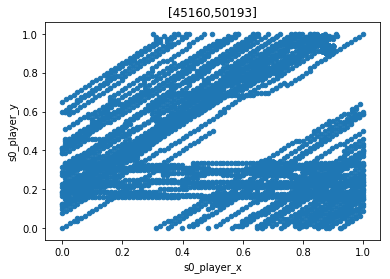

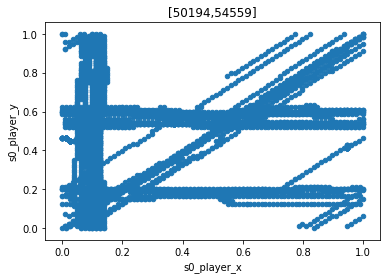

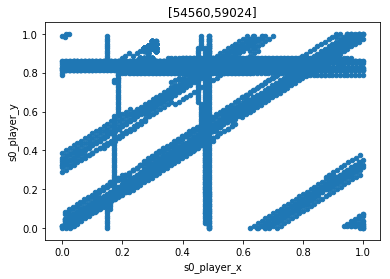

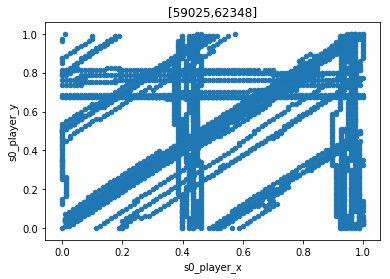

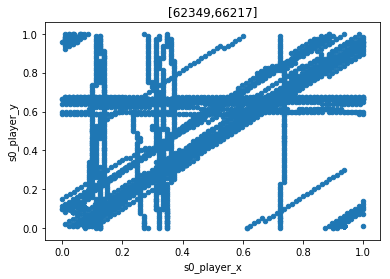

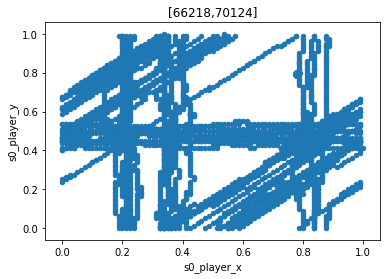

In [12]:
l = [-1]
l.extend(list(df[df['game_over']>0].index))

for p in range(len(l)-1):
    loc0,loc1 = l[p]+1,l[p+1]
    my_title = "["+str(loc0)+","+str(loc1)+"]"
    df.loc[loc0:loc1].plot('s0_player_x','s0_player_y',kind='scatter',title=my_title)
    plt.show()